This is based on the example of fitting of Arrhenius Rate constant parameters given in LearnChemE and in Kitchin's work from CMU.

In this example we use a nonlinear curve-fitting function: scipy.optimize.curve_fit to give us the parameters in a function that we define which best fit the data. The scipy.optimize.curve_fit function also gives us the covariance matrix which we can use to estimate the standard error of each parameter. Finally, we modify the standard error by a student-t value which accounts for the additional uncertainty in our estimates due to the small number of data points that are being fit.  In addition we will calculate the R^2 value (Coefficient of Variation) and variance and make a residual plot.  This template is based on
https://kitchingroup.cheme.cmu.edu/blog/2013/02/12/Nonlinear-curve-fitting-with-parameter-confidence-intervals/

We will fit the function $$k=A\exp\left(-\frac{E}{RT}\right) = k_o\exp\left(-\frac{E}{R}\left[\frac{1}{T}-\frac{1}{T_o}\right]\right)$$ with $T_o=770K$ and $R=8.314 \frac{J}{molK}$ to some data, and compute the 95% confidence intervals on the parameters.

In [46]:
# Nonlinear curve fit with confidence interval
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t
import matplotlib.pyplot as plt

T = np.array([700,730,760,790,810,840])
kexp = np.array([0.011,0.035,0.105,0.343,0.789,2.17])

In [47]:
k0=0.167
E=196345.610389613
ycalc=k0*np.exp(-E/8.3148*(1/T-1/770))
ycalc

array([0.00777755, 0.03111163, 0.1115501 , 0.36299416, 0.75933213,
       2.15085457])

## Many times you need an initial guess of the parameters.
The linearized equation is
$$\ln{k}=\ln{A} - \left(\frac{E}{RT}\right) = \ln{k_o}-\left(\frac{E}{R}\left[\frac{1}{T}-\frac{1}{T_o}\right]\right)$$ with $T_o=770K$ and $R=8.314 \frac{J}{molK}$
$$\ln{k}=\ln{A} - \left(\frac{E}{RT}\right) = \left(\ln{k_o}-\frac{E}{R}\left[\frac{1}{T_o}\right]\right)+ \frac{E}{R}\left[\frac{1}{T}\right]$$
The linearized equation is
$$\ln{k}=\text{constant}_0 - \left(\frac{\text{constant}_1}{T}\right)$$
After you find the two constants you will need to determine $E$ and $k_o$
$$\text{constant}_1=-\frac{E}{R}$$
Solving for $E$
$$E=-\text{constant}_1R$$
Solving for $k_o$
$$k_o = \exp\left({\text{constant}_0-\frac{E}{RT_o}}\right)$$

In [48]:
def funcLIN(T, constant0, constant1):
    #'nonlinear function in ko and E to fit to data'
    lnk=constant0+constant1/T
    return lnk
print(funcLIN(770,1,1))

1.0012987012987014


In [49]:
lnkexp=np.log(kexp)
print(lnkexp)

[-4.50986001 -3.35240722 -2.25379493 -1.07002483 -0.23698896  0.77472717]


In [50]:
pars, pcov = curve_fit(funcLIN, T, lnkexp)
print('pars=', pars)
print('pcov=',pcov)

pars= [    27.28122993 -22336.1563595 ]
pcov= [[ 5.72153155e-01 -4.38143409e+02]
 [-4.38143409e+02  3.36813566e+05]]


In [51]:
alpha = 0.05 # 95% confidence interval = 100*(1-alpha)

n = len(lnkexp)    # number of data points
p = len(pars) # number of parameters

dof = max(0, n - p) # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0-alpha/2., dof) 
print('    Parameter  +/- 95% confidence  [lower 95%   upper 95%]')
for i, p,var in zip(range(n), pars, np.diag(pcov)):
    sigma = var**0.5
    
    print ('p{:d}: {:7.5f} +/- {:7.5f}       [{:7.5f}  {:7.5f}]'
           .format(i, p,sigma*tval,p - sigma*tval,p + sigma*tval))


    Parameter  +/- 95% confidence  [lower 95%   upper 95%]
p0: 27.28123 +/- 2.10013       [25.18110  29.38136]
p1: -22336.15636 +/- 1611.32772       [-23947.48408  -20724.82864]


In [52]:
lnkcalc=pars[0]+pars[1]/T
lnkcalc

array([-4.62756487, -3.31624454, -2.10844949, -0.99238572, -0.29427175,
        0.69056759])

In [53]:
residuals = lnkcalc-lnkexp
ss_res = np.sum(residuals**2)
variance=ss_res/(len(kexp)-len(pars))
print('variance={:7.5}'.format(variance))

variance=0.01317


In [54]:
ss_res = np.sum(residuals**2)
ss_tot = np.sum((lnkexp-np.mean(lnkexp))**2)
r_squared = 1 - (ss_res/ss_tot)
print('r^2={:7.5}'.format(r_squared))

r_squaredAdj=1-ss_res/(len(lnkexp)-len(pars))/ss_tot*(len(lnkexp)-1)
print('r^2Adj={:7.5}'.format(r_squaredAdj))

r^2=0.99731
r^2Adj=0.99663


In [57]:
xfit = np.linspace(700,840)
yfit = funcLIN(xfit, pars[0], pars[1])
print(xfit,yfit)

[700.         702.85714286 705.71428571 708.57142857 711.42857143
 714.28571429 717.14285714 720.         722.85714286 725.71428571
 728.57142857 731.42857143 734.28571429 737.14285714 740.
 742.85714286 745.71428571 748.57142857 751.42857143 754.28571429
 757.14285714 760.         762.85714286 765.71428571 768.57142857
 771.42857143 774.28571429 777.14285714 780.         782.85714286
 785.71428571 788.57142857 791.42857143 794.28571429 797.14285714
 800.         802.85714286 805.71428571 808.57142857 811.42857143
 814.28571429 817.14285714 820.         822.85714286 825.71428571
 828.57142857 831.42857143 834.28571429 837.14285714 840.        ] [-4.62756487 -4.49785432 -4.36919406 -4.24157139 -4.11497379 -3.98938898
 -3.86480484 -3.74120946 -3.61859112 -3.49693828 -3.37623959 -3.25648385
 -3.13766006 -3.01975738 -2.90276515 -2.78667286 -2.67147017 -2.55714689
 -2.44369298 -2.33109858 -2.21935394 -2.10844949 -1.99837579 -1.88912353
 -1.78068355 -1.67304683 -1.56620448 -1.46014774 -1.354

Text(0.5, 1.0, 'Linearized Arrhenius Rate Constant Fit')

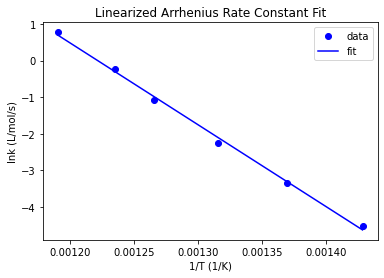

In [59]:
plt.plot(1/T,lnkexp,'bo ')
xfit = np.linspace(840,700)
yfit = funcLIN(T, pars[0], pars[1])
plt.plot(1/T,yfit,'b-')
plt.legend(['data','fit'],loc='best')
plt.xlabel('1/T (1/K)')
plt.ylabel('lnk (L/mol/s)')
plt.title('Linearized Arrhenius Rate Constant Fit')

Text(0, 0.5, '$lnk_{exp}$  - $lnk_{calc}$')

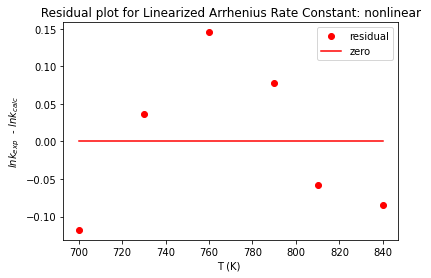

In [60]:
plt.plot(T,residuals,'ro',label='residual')
plt.plot([700,840],[0,0],'r-',label='zero')
plt.legend(loc='best')
plt.title(' Residual plot for Linearized Arrhenius Rate Constant: nonlinear ')
plt.xlabel('T (K) ')
plt.ylabel('$lnk_{exp}$  - $lnk_{calc}$')

## Enough fun comparing to Excel Now for the initial guesses!

In [16]:
E=-pars[1]*8.314
k0=np.exp(pars[0]-E/8.314/770)
print ('Eguess=',E)
print ('k0=',k0)

Eguess= 185702.80397290422
k0= 0.17785879243886543


## Nonlinear Fit

The $+/-$ confidence interval is defined as an element from the diagonal of the covariance matrix to th 1/2 power times the tvalue.

## Please note the initial guess for the curve_fit

In [20]:
# this is the function we want to fit to our data
def func(T, k0, E):
    #'nonlinear function in ko and E to fit to data'
    k=k0*np.exp(-E/8.3148*(1/T-1/770))
    return k

initial_guess=[k0,E]

pars, pcov = curve_fit(func, T, kexp, p0=initial_guess)
print('pars=', pars)
print('pcov=',pcov)

pars= [1.68699388e-01 1.96367539e+05]
pcov= [[ 4.54070449e-05 -2.13777314e+01]
 [-2.13777314e+01  1.04023964e+07]]


In [21]:
alpha = 0.05 # 95% confidence interval = 100*(1-alpha)

n = len(kexp)    # number of data points
p = len(pars) # number of parameters

dof = max(0, n - p) # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0-alpha/2., dof) 
print('    Parameter  +/- 95% confidence  [lower 95%   upper 95%]')
for i, p,var in zip(range(n), pars, np.diag(pcov)):
    sigma = var**0.5
    
    print ('p{:d}: {:7.5f} +/- {:7.5f}       [{:7.5f}  {:7.5f}]'
           .format(i, p,sigma*tval,p - sigma*tval,p + sigma*tval))


    Parameter  +/- 95% confidence  [lower 95%   upper 95%]
p0: 0.16870 +/- 0.01871       [0.14999  0.18741]
p1: 196367.53877 +/- 8954.79792       [187412.74084  205322.33669]


In [22]:
print(np.diag(pcov))
print(np.diag(pcov)[0]**0.5*t.ppf(1.0-alpha/2., dof) )
print(np.diag(pcov)[1]**0.5*t.ppf(1.0-alpha/2., dof) )

[4.54070449e-05 1.04023964e+07]
0.018709005837435053
8954.797923109005


In [23]:
kcalc=pars[0]*np.exp(-pars[1]/8.3148*(1/T-1/770))
kcalc

array([0.00785401, 0.03142232, 0.11268015, 0.36671977, 0.76718882,
       2.17336185])

In [24]:
residuals = kcalc-kexp
ss_res = np.sum(residuals**2)
variance=ss_res/(len(kexp)-len(pars))
print('variance={:7.5}'.format(variance))

variance=0.00028283


In [25]:
ss_res = np.sum(residuals**2)
ss_tot = np.sum((kexp-np.mean(kexp))**2)
r_squared = 1 - (ss_res/ss_tot)
print('r^2={:7.5}'.format(r_squared))

r_squaredAdj=1-ss_res/(len(kexp)-len(pars))/ss_tot*(len(kexp)-1)
print('r^2Adj={:7.5}'.format(r_squaredAdj))

r^2=0.99967
r^2Adj=0.99959


Text(0.5, 1.0, 'Arrhenius Rate Constant Fit')

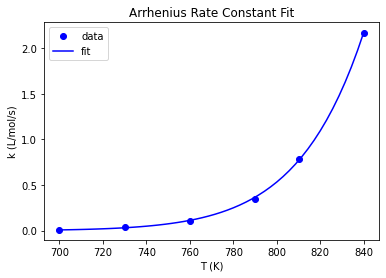

In [26]:
plt.plot(T,kexp,'bo ')
xfit = np.linspace(700,840)
yfit = func(xfit, pars[0], pars[1])
plt.plot(xfit,yfit,'b-')
plt.legend(['data','fit'],loc='best')
plt.xlabel('T (K)')
plt.ylabel('k (L/mol/s)')
plt.title('Arrhenius Rate Constant Fit')

Text(0, 0.5, '$k_{exp}$  - $k_{calc}$')

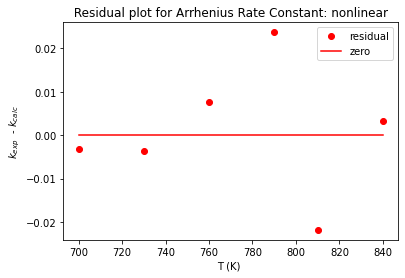

In [27]:
plt.plot(T,residuals,'ro',label='residual')
plt.plot([700,840],[0,0],'r-',label='zero')
plt.legend(loc='best')
plt.title(' Residual plot for Arrhenius Rate Constant: nonlinear ')
plt.xlabel('T (K) ')
plt.ylabel('$k_{exp}$  - $k_{calc}$')